In [1]:
%load_ext autoreload
%autoreload 2

# Qwind

This notebook shows a quick example on how to get Qwind up and running.

First, we load the core code module.

In [2]:
from qwind import wind

/home/arnau/miniconda3/envs/qwind/lib/python3.8/site-packages/assimulo/solvers/odepack.py:701: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  N.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.],  # 5th order


Next we initialise the black hole system, the parameters we can specifiy are:

For now we just initialise it with the default values,

In [3]:
example = wind.Qwind(lines_r_min = 60, lines_r_max=200, f_x=0.1, rho_shielding=1e10, nr=80, T=25e3)

We can now initialise a streamline at a certain radius with some initial density and velocity by doing

In [4]:
line = example.line(r_0 = 150, rho_0 = 1e10, v_z_0 = 1e7, max_iter=1000)

And iterate its equation of motion

In [5]:
line.iterate()

 💥 

As we have been indicated, the line has fallen back to the disc. We can now plot different properties of the stramline.

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'z [Rg]')

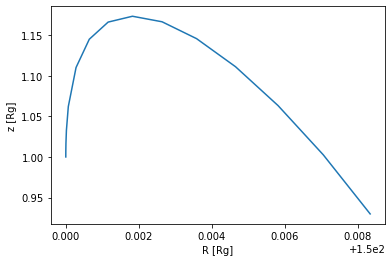

In [7]:
plt.plot(line.r_hist, line.z_hist)
plt.xlabel("R [Rg]")
plt.ylabel("z [Rg]")

The ammount of debugging information available for a streamline is:

In [8]:
for key in line.__dict__.keys():
    if 'hist' in key:
        print(key)

fg_hist
fr_hist
d_hist
t_hist
r_hist
phi_hist
z_hist
v_r_hist
v_phi_hist
v_z_hist
v_T_hist
v_th_hist
rho_hist
tau_dr_hist
dv_dr_hist
tau_uv_hist
tau_x_hist
tau_eff_hist
fm_hist
xi_hist
T_hist
a_hist
a_T_hist


We can also lunch several lines at once.

In [9]:
example.start_lines(v_z_0=1e7, rho_0=1e10)

 💥  ❓  💨  💨  💨  💨  💨  💨  💨  💨  💨  💨  💨  💨  💨  💨  💨  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥 

You might have noticed some question marks for some lines, these means that they have been terminated because they were stalling. This is common in the boundary area where tau_x ~ 1 or tau_uv ~ 1

(0.0, 500.0)

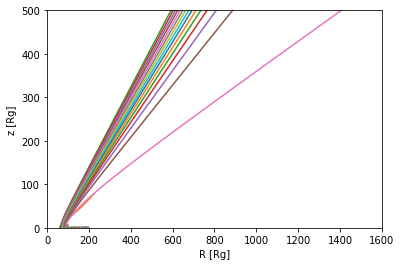

In [10]:
for line in example.lines:
    plt.plot(line.r_hist, line.z_hist)
plt.xlabel("R [Rg]")
plt.ylabel("z [Rg]")
plt.xlim(0,1600)
plt.ylim(0,500)

In [11]:
example.mdot_w # units of g/s

9.218237657197967e+23

In [12]:
example.radiation.optical_depth_x(100, 50, 50, example.tau_dr_0, example.tau_dr_0, 1e10)

5.395230294193791

In [13]:
example.radiation.optical_depth_uv(100, 50, 50, example.tau_dr_0, example.tau_dr_0)

6.589594252450431

In [14]:
np.exp(-example.radiation.optical_depth_uv(100, 50, 50, example.tau_dr_0, example.tau_dr_0))

NameError: name 'np' is not defined